# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Prerequisites

Before starting this project, you should have some basic knowledge of Python programming and Pandas. In addition, you may want to use the following packages in your Python environment:

- pandas
- numpy
- seaborn
- matplotlib

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns             
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
sns.set_style("whitegrid")

In [2]:
# your code here
file_path = "Online Retail.xlsx"
df = pd.read_excel(file_path)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


## Task 2: Data Cleaning

In [5]:
print(df.isnull().sum())
print(f"\nInitial rows: {df.shape[0]} ")

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Initial rows: 541909 


In [6]:
duplicates = df[df.duplicated()] # there is duplicated registers
df = df.drop_duplicates(keep="first")

print(f"\nTotal duplicated rows: {duplicates.shape[0]}")


Total duplicated rows: 5268


In [7]:
negatives_prices = df[df['UnitPrice'] < 0]# need remove registers with negative or zero prices
df = df[df['UnitPrice'] > 0] 
print(f"\nWrong prices rows: {negatives_prices.shape[0]}")


Wrong prices rows: 2


In [8]:
returns = df[df.Quantity < 0]#Separate returns registers ( where quantity is negative)
df = df[df["Quantity"] > 0]
print(f"\nReturns: {returns.shape[0]}")


Returns: 9251


In [9]:
nulls = df.loc[df['CustomerID'].isnull()] # delete the rows without CustomerID
df = df.dropna(subset=["CustomerID"])
print(f"\nNull Customers: {nulls.shape[0]}")


Null Customers: 132186


In [10]:
print(f"\nDataset info after cleaning: {df.shape[0]}")


Dataset info after cleaning: 392692


## Task 3: Exploring Data

In [11]:
display(df.describe())
# could see that there is a high variation in the quantity, indicationg that could be ouliers. The max of Quantity also show it
# also happen in the UnitPrice, with 25,50,75 percentil highly lower than the max show that also. There is a very cheap item,
# maybe pricing error. 


,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
print("\nNumber of unique values in categorical columns:")
print(df[["InvoiceNo", "StockCode", "Description", "CustomerID", "Country"]].nunique()) # check the unique values in every categorical column


Number of unique values in categorical columns:
InvoiceNo      18532
StockCode       3665
Description     3877
CustomerID      4338
Country           37
dtype: int64


In [13]:
# Here we are going to calculate the total revenue and the average revenue of the orders
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
total_revenue = df["TotalPrice"].sum()
average_order_value = df.groupby("InvoiceNo")["TotalPrice"].sum().mean()

print(f"\nTotal Revenue: ${total_revenue:,.2f}")
print(f"Average Order Value: ${average_order_value:,.2f}")


Total Revenue: $8,887,208.89
Average Order Value: $479.56


## Task 4: Data Visualization

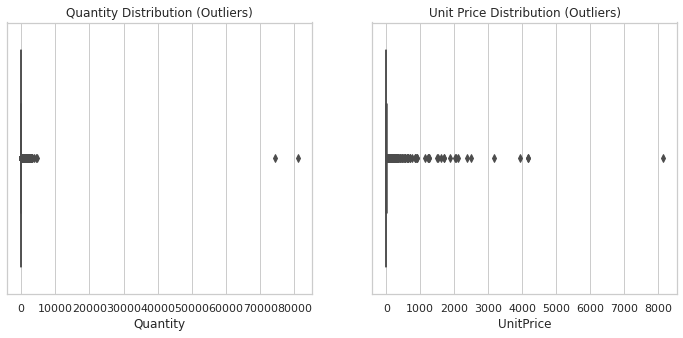

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x=df["Quantity"], ax=axes[0])
axes[0].set_title("Quantity Distribution (Outliers)")

sns.boxplot(x=df["UnitPrice"], ax=axes[1])
axes[1].set_title("Unit Price Distribution (Outliers)")

plt.show() # Now we can corroborate the hypothesis of outliers

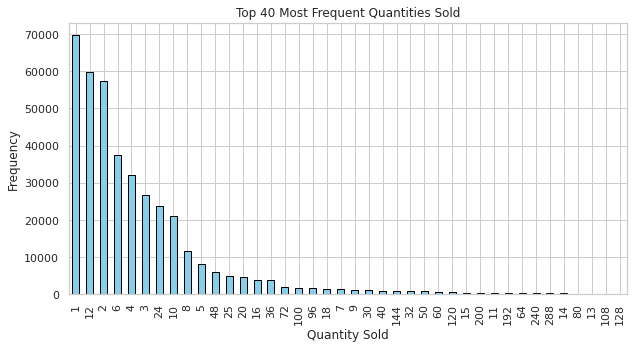

In [15]:
# Histogram for Quantity 

# plt.figure(figsize=(10, 5))
# plt.hist(df['Quantity'], bins=100, edgecolor='black')
# plt.xlim(0, 100)  # Adjust limit if needed
# plt.xlabel('Quantity Sold')
# plt.ylabel('Frequency')
# plt.title('Distribution of Quantity Sold per Transaction')
# plt.show()

df['Quantity'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color='skyblue', edgecolor='black')
plt.title("Top 40 Most Frequent Quantities Sold")
plt.ylabel('Frequency')
plt.xlabel('Quantity Sold')
plt.show()

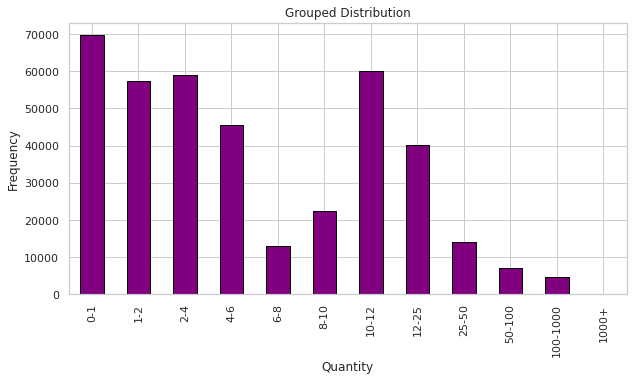

In [16]:
df['Quantity_Group'] = pd.cut(df['Quantity'], bins=[0, 1, 2, 4, 6, 8,10, 12,25, 50,100,1000, df['Quantity'].max()], 
                              labels=['0-1', '1-2', '2-4', '4-6', '6-8', '8-10','10-12','12-25','25-50','50-100','100-1000', '1000+'])

plt.figure(figsize=(10, 5))
df['Quantity_Group'].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Grouped Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

df = df.drop('Quantity_Group', axis=1)

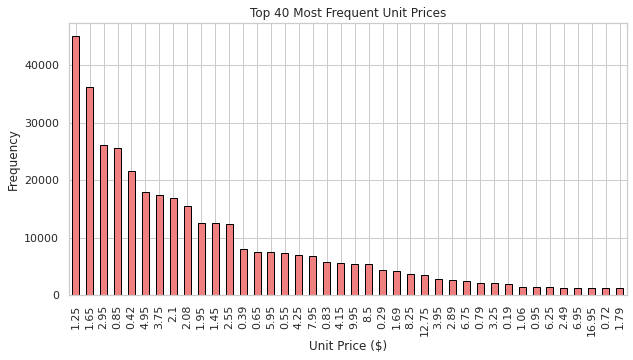

In [17]:
# Histogram for Unit Price

# plt.figure()
# plt.hist(df['UnitPrice'])
# plt.xlim(0, 50)  # Limiting to $50 to focus on majority of sales
# plt.xlabel('Unit Price ($)')
# plt.ylabel('Frequency')
# plt.title('Distribution of Product Prices')
# plt.show()

df['UnitPrice'].value_counts().nlargest(40).plot(kind='bar', figsize=(10,5), color='lightcoral', edgecolor='black')
plt.title("Top 40 Most Frequent Unit Prices")
plt.ylabel('Frequency')
plt.xlabel('Unit Price ($)')
plt.show()

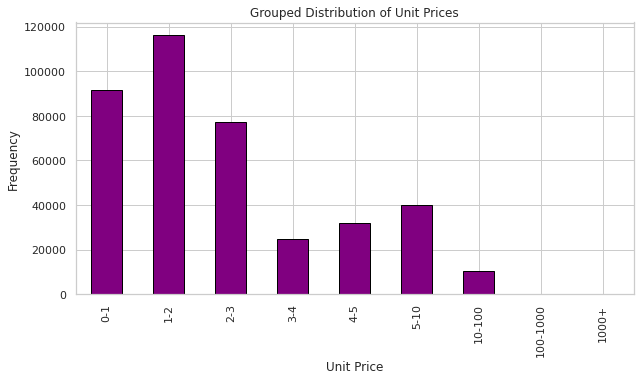

In [18]:
df['UnitPrice_Group'] = pd.cut(df['UnitPrice'], 
                               bins=[0, 1, 2, 3, 4, 5, 10, 100, 1000, df['UnitPrice'].max()], 
                               labels=['0-1', '1-2', '2-3', '3-4', '4-5', '5-10', '10-100','100-1000', '1000+'])

# Visualizing the grouped distribution of UnitPrice
plt.figure(figsize=(10, 5))
df['UnitPrice_Group'].value_counts().sort_index().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Grouped Distribution of Unit Prices")
plt.xlabel("Unit Price")
plt.ylabel("Frequency")
plt.show()

# Dropping the 'UnitPrice_Group' column after visualization
df = df.drop('UnitPrice_Group', axis=1)

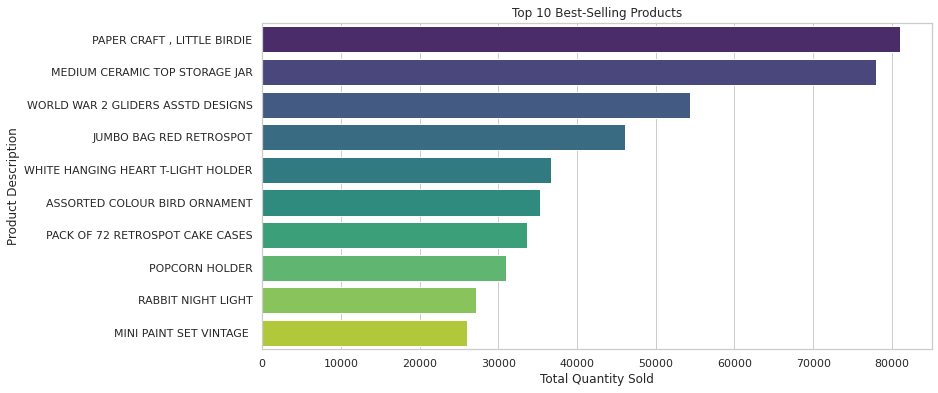

In [19]:
#Top 10 products
top_products = df.groupby('Description')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Description')
plt.title('Top 10 Best-Selling Products')
plt.show()

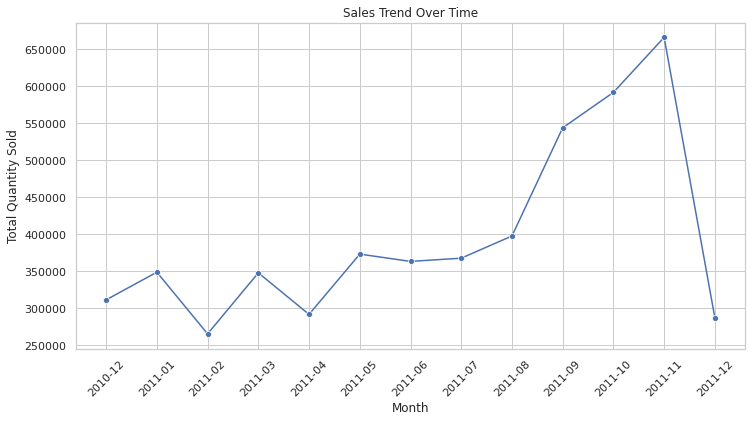

In [23]:
# Convert InvoiceDate to datetime
# df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Sales per month
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()


plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Trend Over Time')
plt.show()

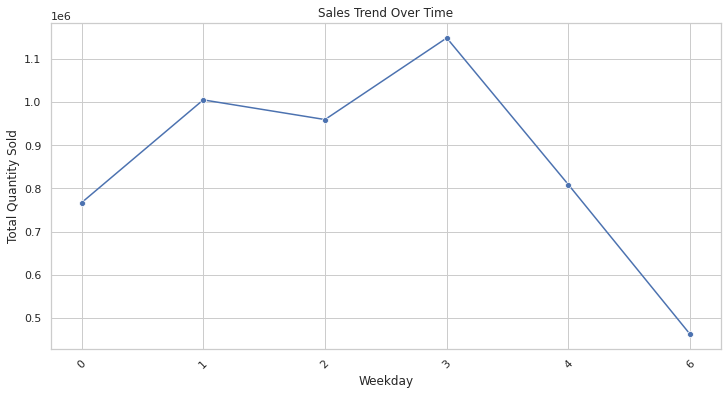

In [26]:
# Sales per month
df['Weekday'] = df['InvoiceDate'].dt.weekday
weekday_sales = df.groupby('Weekday')['Quantity'].sum()


plt.figure(figsize=(12,6))
sns.lineplot(x=weekday_sales.index.astype(str), y=weekday_sales.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel('Weekday')
plt.ylabel('Total Quantity Sold')
plt.title('Sales Trend Over Time')
plt.show()

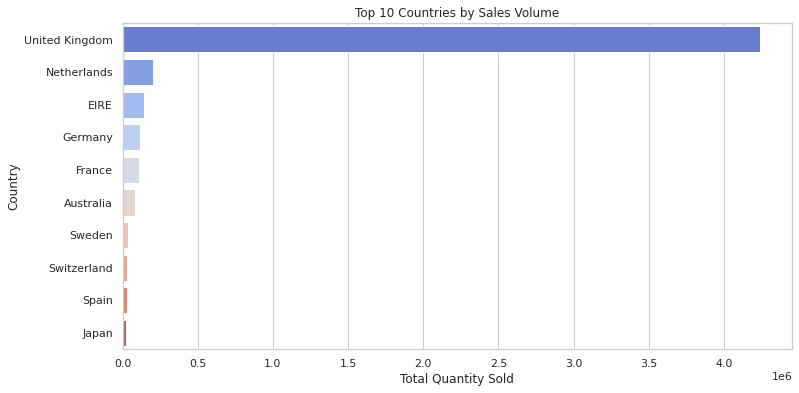

In [27]:
# Top 10 Countries by Sales
top_countries = df.groupby('Country')['Quantity'].sum().nlargest(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.title('Top 10 Countries by Sales Volume')
plt.show()

## Conclution

#### Sales Trends: Identified peak sales months and days, revealing patterns that can optimize staffing, marketing, and inventory.

#### Popular Products: Top-selling products were pinpointed, which could inform future inventory and promotional strategies.

#### Outliers: Extreme values in Quantity and UnitPrice were found, with some representing bulk orders or errors. Further investigation is needed to decide how to treat these outliers.

#### Data Quality: Missing values and inconsistent entries were handled to ensure clean, reliable data.


#### Next steps with this data: Optimize inventory for the popular ones, Target high-value customers for marketing campaings in Top Countris and new strategy to grow Bottom.